# imports:

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import numpy as np

In [4]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-13 16:04:13--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-13 16:04:13--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccbf373176e605339f0e4a04eb1.dl.dropboxusercontent.com/cd/0/inline/BnLybBHNiP4Rk_wYLETZ5qJKmj8hFoOSkl-quiCndPFDBNboMn7vXjFaPNlJrpsFdeFc_qduhQGMVb8u7cagXBYygxFzY35XiwBvTwL_eike7PhpwoKNesbt5tRHMrYMzj7RL57h7yO2lU1XEoDfG3pRPSfEslRQGa5ZqCkxS91euw/file# [following]
--2022-06-13 16:04:13--  https://uccbf373176e605339f0e4a04eb1.dl.dropboxusercontent.com/cd/0/inline/BnLybBHNiP4Rk_wYLETZ5qJKmj8hFoOSkl-quiCndPFDBNboMn7vXjFaPNlJrpsFdeFc_qduhQGMVb8u7ca

In [5]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

#Q5

### read data

In [6]:
from keras.datasets import mnist 
(train_X, train_y), (test_X, test_y) = mnist.load_data() 
print('X_train: ' + str(train_X.shape)) 
print('Y_train: ' + str(train_y.shape)) 
print('X_test: ' + str(test_X.shape)) 
print('Y_test: ' + str(test_y.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [7]:
train_X.shape

(60000, 28, 28)

In [8]:
# xtrain = train_X.reshape(60000, 28*28)
# xtest = test_X.reshape(10000, 28*28)
xtrain = train_X.astype('float32')
xtest = test_X.astype('float32')
xtrain /= 255.
xtest /= 255.
ytrain = train_y
ytest = test_y

In [9]:
xtrainoriginal = np.copy(xtrain)
xtestoriginal = np.copy(xtest)

xtrainoriginal = xtrainoriginal.reshape(60000, 28*28)
xtestoriginal = xtestoriginal.reshape(10000, 28*28)

### feature extraction

In [10]:


class feature_extraction():
    def __init__(self):
        pass
    
    @staticmethod
    def binary(img,th=0.5):
        img2 = np.copy(img)
        img2[img2>th]=1
        img2[img2<1]=0
        return img2
    
    @staticmethod
    def area(img):
        img2 = np.copy(img)
        img2 = feature_extraction.binary(img)
        return int(img2.sum())

    @staticmethod
    def char_dar_char(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
            for j in range(4):
                subim = img2[i*7:i*7+6,j*7:j*7+6]
                out.append(round(subim.sum()/49,2))
        return out
    
    @staticmethod
    def do_dar_do(img):
        img2 = np.copy(img)
        out = []
        for i in range(2):
            for j in range(2):
                subim = img2[i*14:i*14+13,j*14:j*14+13]
                out.append(round(subim.sum()/196,2))
        return out
    
    @staticmethod
    def char_axis1(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[i*7:i*7+6,:]
                out.append(round(subim.sum()/196,2))
        return out
    
    @staticmethod
    def char_axis2(img):
        img2 = np.copy(img)
        out = []
        for i in range(4):
                subim = img2[:,i*7:i*7+6]
                out.append(round(subim.sum()/196,2))
        return out
    
    @staticmethod
    def vertical_edge(img):
        kernel = np.array([[1,0],[1,0]])
        afterkernel = cv2.filter2D(img,-1,kernel)
        return round(afterkernel.sum()/(784),2)
    
    @staticmethod
    def horisental_edge(img):
        kernel1 = np.array([[1,1],[0,0]])
        kernel2 = np.array([[0,0],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round((afterkernel1.sum()+afterkernel2.sum())/(784*2),2)

    @staticmethod
    def kaj_chap_edge(img):
        kernel1 = np.array([[1,1],[1,0]])
        kernel2 = np.array([[0,1],[1,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/784,2),round(afterkernel2.sum()/784,2)

    @staticmethod
    def kaj_rast_edge(img):
        kernel1 = np.array([[1,0],[1,1]])
        kernel2 = np.array([[1,1],[0,1]])

        afterkernel1 = cv2.filter2D(img,-1,kernel1)
        afterkernel2 = cv2.filter2D(img,-1,kernel2)
        return round(afterkernel1.sum()/784,2),round(afterkernel2.sum()/784,2)

    @staticmethod
    def runall(imgs):
        out = []
        for img in tqdm(imgs):
            f = []
            f.append(feature_extraction.area(img)/784)
            for i in feature_extraction.char_dar_char(img):
                f.append(i)
            for i in feature_extraction.do_dar_do(img):
                f.append(i)
            for i in feature_extraction.char_axis1(img):
                f.append(i)
            for i in feature_extraction.char_axis2(img):
                f.append(i)
            f.append(feature_extraction.vertical_edge(img))
            f.append(feature_extraction.horisental_edge(img))
            for i in feature_extraction.kaj_chap_edge(img):
                f.append(i)
            for i in feature_extraction.kaj_rast_edge(img):
                f.append(i)
            out.append(f[:])
        return np.array(out)

In [11]:
img = np.copy(xtrain[0])

In [12]:
feature_extraction.runall([img])

100%|██████████| 1/1 [00:00<00:00, 21.14it/s]


array([[0.14158163, 0.        , 0.        , 0.04      , 0.05      ,
        0.        , 0.35      , 0.19      , 0.01      , 0.        ,
        0.        , 0.47      , 0.        , 0.05      , 0.35      ,
        0.05      , 0.        , 0.1       , 0.12      , 0.12      ,
        0.15      , 0.03      , 0.16      , 0.12      , 0.13      ,
        0.01      , 0.19      , 0.24      , 0.02      , 0.28      ,
        0.28      , 0.41      , 0.41      , 0.41      , 0.41      ]])

In [13]:
featuredx = feature_extraction.runall(xtrain)

100%|██████████| 60000/60000 [00:33<00:00, 1782.11it/s]


In [14]:
featuredxtest = feature_extraction.runall(xtest)

100%|██████████| 10000/10000 [00:05<00:00, 1702.25it/s]


### random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
acclist = []
avoid_long_run = True
if avoid_long_run:
    acclist = [0.5519, 0.6364, 0.7481, 0.8185, 0.8625, 0.892, 0.9179, 0.9297, 0.9387, 
           0.947, 0.9542, 0.9592, 0.9629, 0.9636, 0.9679, 0.9668, 0.9689, 0.9678, 0.9683]
else:
    for maxdepth in tqdm(range(1,20)):
        xtrain = xtrain.reshape(60000, 28*28)
        xtest = xtest.reshape(10000, 28*28)
        clf = RandomForestClassifier(max_depth=maxdepth, random_state=0)
        clf.fit(xtrain, ytrain)
        ypredicted = clf.predict(xtest)
        acc = sum(ypredicted == ytest)/len(ytest)
        acclist.append(acc)

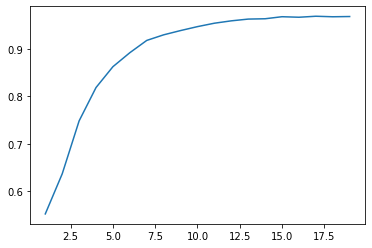

In [16]:
plt.plot(range(1,20),acclist)
plt.title = 'random forest acc based on maxdepth without custom features'
plt.show()

In [17]:
xtrain = featuredx
xtest = featuredxtest

In [18]:
from sklearn.ensemble import RandomForestClassifier
acclistrf = []
avoid_long_run = True
if avoid_long_run:
    acclistrf = [0.4112, 0.5285, 0.6047, 0.6612, 0.6991, 0.7357, 0.7637, 0.7834,
                0.7964, 0.8128, 0.8235, 0.8329, 0.8412, 0.848, 0.8507, 0.855, 0.8581, 0.8586, 0.8587]
else:
    for maxdepth in tqdm(range(1,20)):
        
        clf = RandomForestClassifier(max_depth=maxdepth, random_state=0)
        clf.fit(xtrain, ytrain)
        ypredicted = clf.predict(xtest)
        acc = sum(ypredicted == ytest)/len(ytest)
        acclistrf.append(acc)

In [19]:
acclistrf

[0.4112,
 0.5285,
 0.6047,
 0.6612,
 0.6991,
 0.7357,
 0.7637,
 0.7834,
 0.7964,
 0.8128,
 0.8235,
 0.8329,
 0.8412,
 0.848,
 0.8507,
 0.855,
 0.8581,
 0.8586,
 0.8587]

No handles with labels found to put in legend.


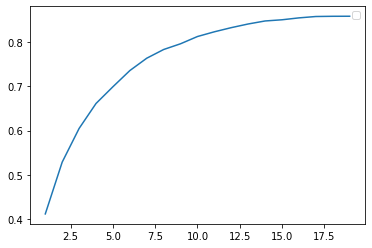

In [20]:
plt.plot(range(1,20),acclistrf)
plt.title = ('random forest acc based on maxdepth based on custom features')
plt.legend()
plt.show()

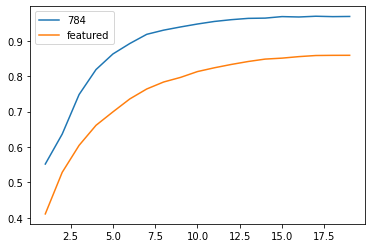

In [21]:
plt.plot(range(1,20),acclist,label='784')
plt.plot(range(1,20),acclistrf,label='featured')

plt.legend()
plt.show()

### K nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
acclistknn = []
avoid_long_run = True
if avoid_long_run:
    acclistknn = [0.7862, 0.7839, 0.8116, 0.8171, 0.8244, 0.8235, 0.8257, 0.8229,
                  0.823, 0.8223, 0.8203, 0.8217, 0.8216, 0.8209, 0.8205, 0.8207, 0.8194, 0.8186, 0.8166]
else:
    for i in tqdm(range(1,20)):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xtrain, ytrain) 
        acclistknn.append((knn.predict(xtest)== ytest).sum()/len(ytest))

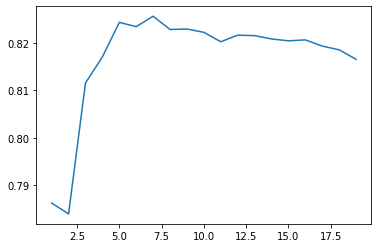

In [24]:
plt.plot(range(1,20),acclistknn)
plt.title = 'k nearest neighbor acc based on # of neighbors based on custom features'
plt.show()

In [25]:
acclistknnoriginal = []
avoid_long_run = True
if avoid_long_run:
    acclistknnoriginal = [0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694, 0.967, 0.9659]
else:
    for i in tqdm(range(1,10)):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xtrainoriginal, ytrain) 
        acclistknnoriginal.append((knn.predict(xtestoriginal)== ytest).sum()/len(ytest))

In [26]:
acclistknnoriginal

[0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694, 0.967, 0.9659]

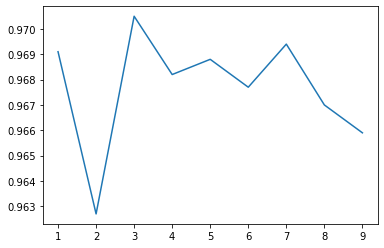

In [27]:
plt.plot(range(1,10),acclistknnoriginal)
plt.title = 'k nearest neighbor acc based on # of neighbors based on original features'
plt.show()

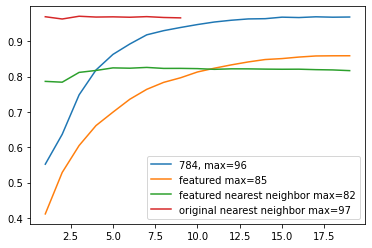

In [28]:
plt.plot(range(1,20),acclist,label='784, max='+str(int(100*max(acclist))))
plt.plot(range(1,20),acclistrf,label='featured max='+str(int(100*max(acclistrf))))
plt.plot(range(1,20),acclistknn,label='featured nearest neighbor max='+str(int(100*max(acclistknn))))
plt.plot(range(1,10),acclistknnoriginal,label='original nearest neighbor max='+str(int(100*max(acclistknnoriginal))))


plt.legend()
plt.show()

### EM

based on https://www.vtupulse.com/machine-learning/k-means-and-em-algorithm-in-python/
we can use from scikit-learn, the GaussianMixture object implementation because it uses **expectation-maximization (EM)** algorithm for fitting mixture-of-Gaussian models.

there is same description in scikit-learn site.

In [29]:
from sklearn.mixture import GaussianMixture

In [30]:
xtrain = xtrainoriginal.reshape((-1,28*28))
xtest = xtestoriginal.reshape((-1,28*28))


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
x = pca.fit_transform(xtrain)

In [32]:
xx = pca.fit_transform(xtest)

In [33]:
x.shape,len(ytrain)

((60000, 40), 60000)

(60000,)


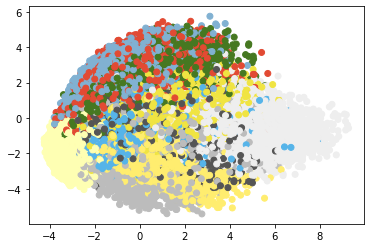

In [34]:
collist = [u'#feffb3',u'#bcbcbc',u'#ffed6f',u'#467821',u'#555555',u'#F0E442',u'#81b1d2',u'#56B4E9',u'#E24A33',u'#eeeeee']
col = []
for i in range(len(x)):
    try:
        col.append(collist[int(ytrain[i])-1])
    except:
        print(ytrain[i])

col = np.array(col)
print(col.shape)
plt.scatter(x.T[0],x.T[1],c = col)

In [42]:
model=GaussianMixture(n_components=10, verbose=True)

model.fit(x,ytrain)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(n_components=10, verbose=True)

In [43]:
predicted_labels = model.predict(xx)
acc = 0
for cls in set(ytest):
    tmp_pred = predicted_labels[ytest == cls]
    true_pred = np.bincount(tmp_pred).argmax()
    acc += np.sum(tmp_pred == true_pred)/len(ytest)
print(acc)

0.7199


In [44]:
model=GaussianMixture(n_components=10, verbose=True)

model.fit(featuredx,ytrain)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(n_components=10, verbose=True)

In [45]:
predicted_labels = model.predict(featuredxtest)
acc = 0
for cls in set(ytest):
    tmp_pred = predicted_labels[ytest == cls]
    true_pred = np.bincount(tmp_pred).argmax()
    acc += np.sum(tmp_pred == true_pred)/len(ytest)
print(acc)

0.42150000000000004


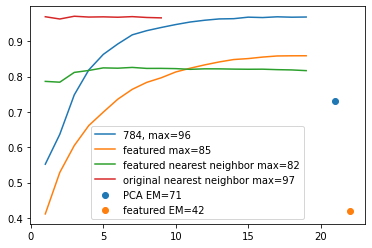

In [46]:
plt.plot(range(1,20),acclist,label='784, max='+str(int(100*max(acclist))))
plt.plot(range(1,20),acclistrf,label='featured max='+str(int(100*max(acclistrf))))
plt.plot(range(1,20),acclistknn,label='featured nearest neighbor max='+str(int(100*max(acclistknn))))
plt.plot(range(1,10),acclistknnoriginal,label='original nearest neighbor max='+str(int(100*max(acclistknnoriginal))))
plt.scatter([21],[0.73],label='PCA EM='+str(71))
plt.scatter([22],[0.42],label='featured EM='+str(42))

plt.legend()
plt.show()